# Linear Regression with Scikit-learn
This notebook provides a step-by-step tutorial on performing Linear Regression using the Diabetes dataset from the `sklearn.datasets` module.

We'll cover:
- Loading and exploring the dataset
- Visualizing the data
- Training a Linear Regression model
- Understanding Assumptions of Linear Regression
- Methods of Evaluating model performance

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load and Understand the Dataset

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# View the keys available in the dataset
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Show first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135.00


## About the Dataset
The Diabetes dataset contains 10 baseline variables (features), age, sex, body mass index, average blood pressure, and six blood serum measurements obtained for each of 442 diabetes patients.

- Features: 10 numerical values
- Target: A quantitative measure of disease progression one year after baseline

### Exploratory Data Analysis (EDA)

In [4]:
# Basic statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [5]:
# Check for missing values
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

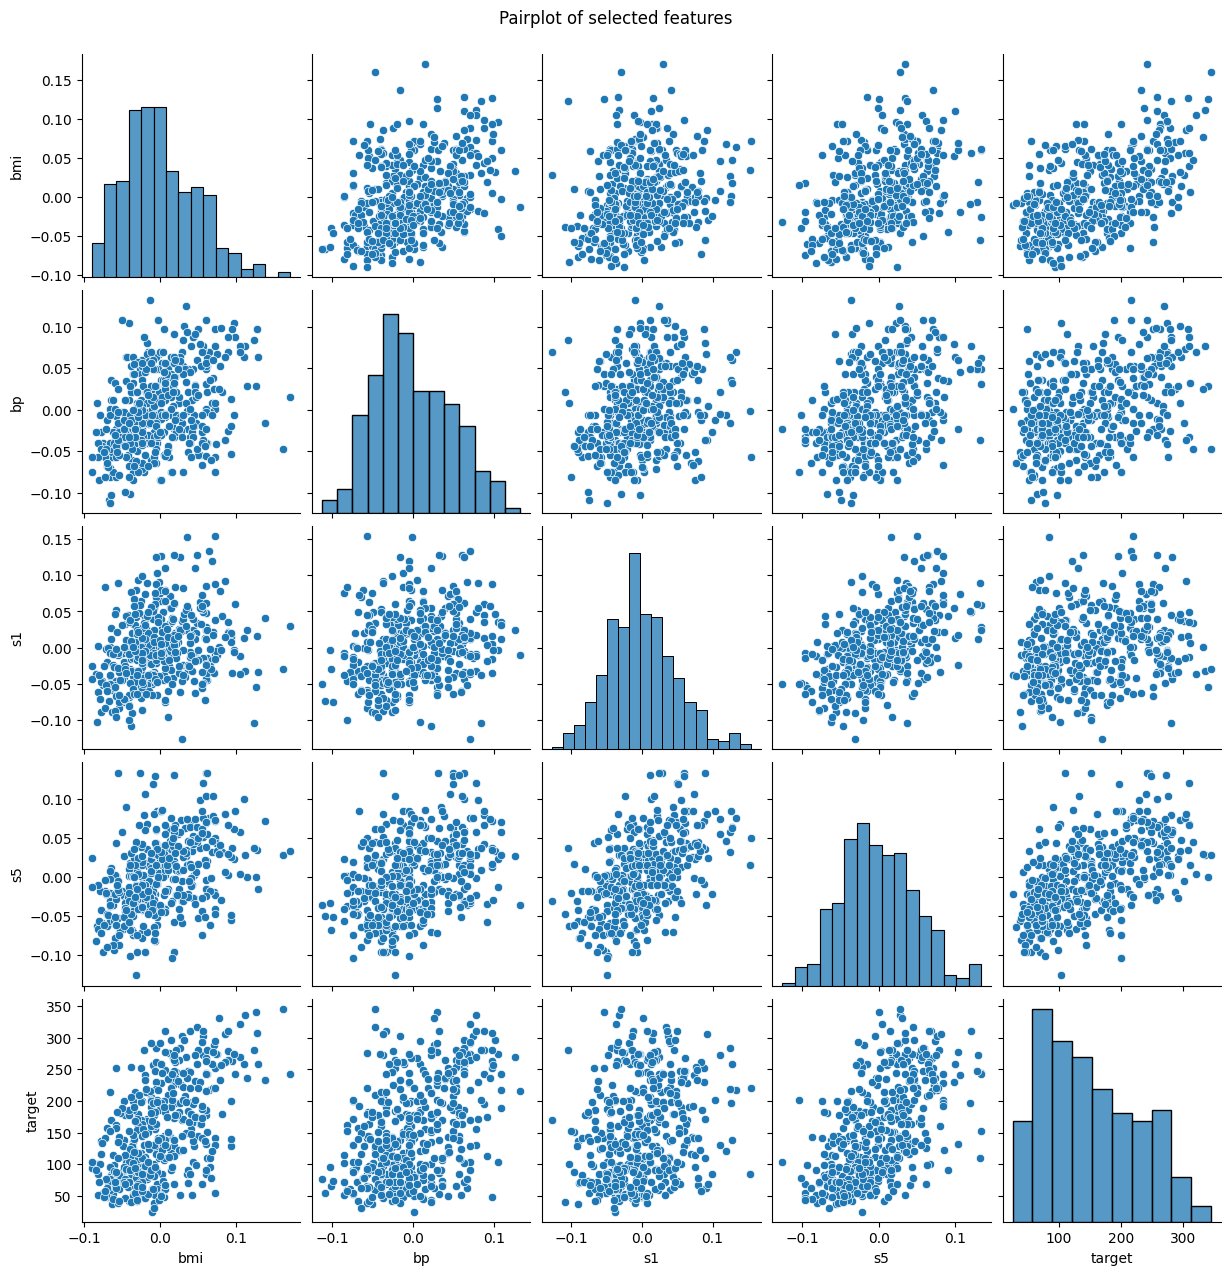

In [6]:
# Pairplot to visualize relationships
sns.pairplot(df[['bmi', 'bp', 's1', 's5', 'target']])
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()

### Correlation Matrix

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display it
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


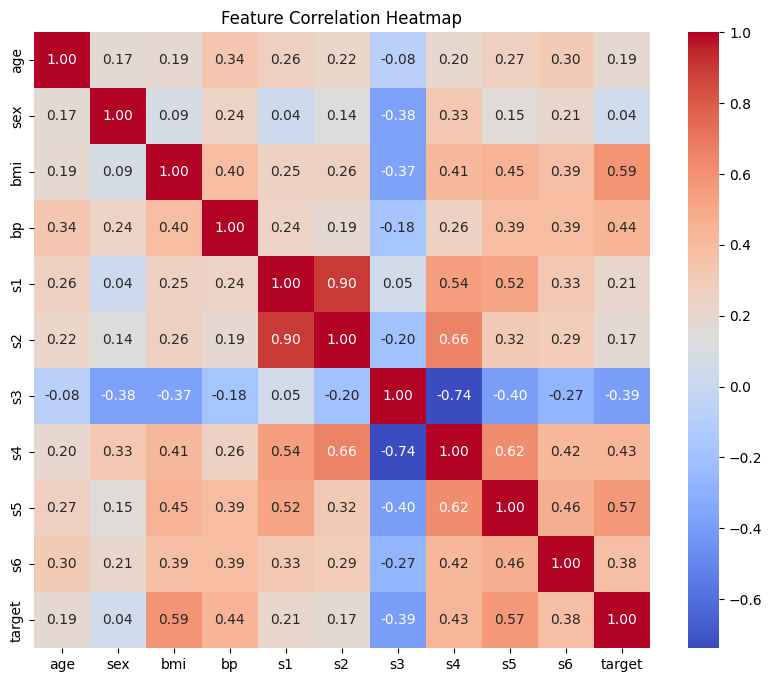

In [8]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

We see some features like `bmi` and `s5` have strong linear relationships with the target.


### Split the Dataset

In [9]:
# Features and target
X = df.drop(columns='target')
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Linear Regression Model

In [10]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Model coefficients
coef_df = pd.Series(lr_model.coef_, index=X.columns)

### 🧮 What Are Model Coefficients?

In a linear regression model, the relationship between input features and the target is modeled as:

$$y = β₀ + β₁·x₁ + β₂·x₂ + ... + βₙ·xₙ$$


Where:
- **β₀** = Intercept (the baseline value when all features are 0)
- **β₁, β₂, ..., βₙ** = Coefficients of the features
- **x₁, x₂, ..., xₙ** = Feature values

Each **coefficient (β)** represents the expected **change in the target** for a **one-unit increase** in that feature, **holding all other features constant**.

**Interpreting the Output:**
- If `bmi` has a coefficient of `542.0`, then:
  > An increase of 1 unit in normalized BMI increases the predicted disease progression by 542 units, assuming all else stays the same.
- A **positive coefficient** means the feature increases the target.
- A **negative coefficient** means the feature decreases the target.


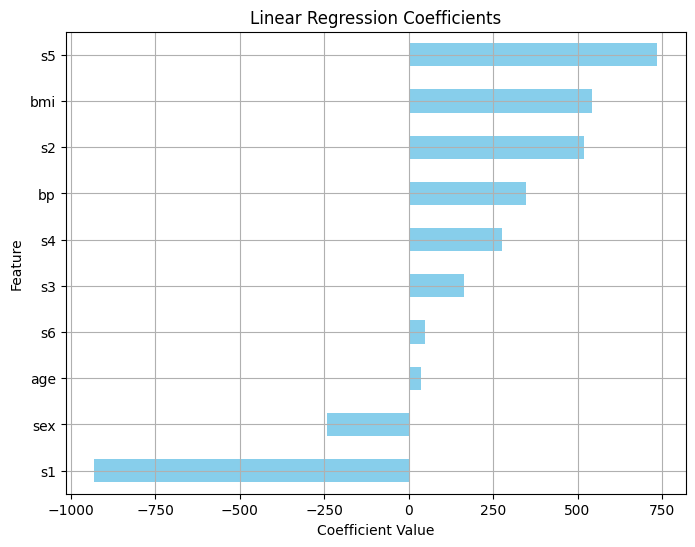

In [12]:
# Visualize coefficients for easier interpretation
coef_df.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

### Coefficient Plot Explanation

This plot helps you quickly visualize:

- Which features have the **largest impact** (positive or negative) on the prediction.
- The **direction** of influence:
  - Right (positive): increases the target.
  - Left (negative): decreases the target.

From the Diabetes dataset:
- **s5** and **bmi** typically have the strongest positive coefficients.
- **s1** often has a negative coefficient, indicating an inverse relationship.

Use this plot to guide feature selection, regularization, or even clinical interpretation if applicable.

In [13]:
# Intercept
lr_model.intercept_

np.float64(151.34560453985995)

### What Is the Intercept?

The **intercept (β₀)** is the predicted value of the target when **all input features are zero**.

Since the dataset is **normalized**, an input of zero for all features means the average patient (because features are mean-centered).

So the **intercept** represents the **predicted disease progression** for an average patient across all measured features.

In real-world data (non-normalized), the intercept can be harder to interpret directly.

### Prediction

In [14]:
# Predicted values
y_pred = lr_model.predict(X_test)

### Plot Predictions vs Actual

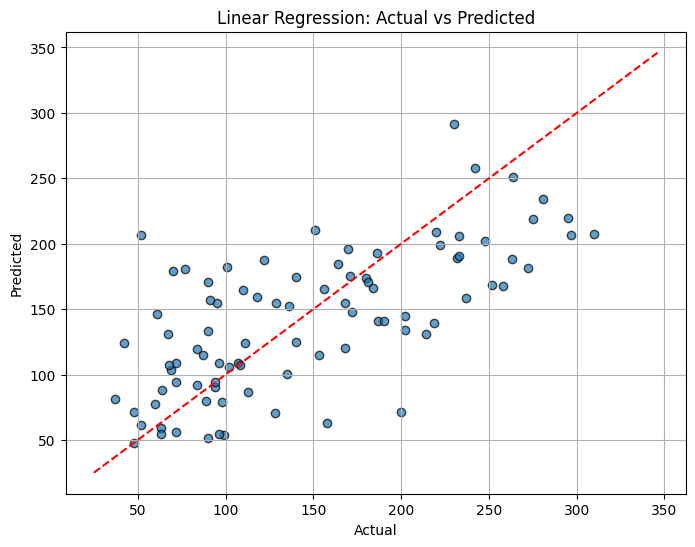

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

### Assumptions of Linear Regression

Linear Regression relies on several key assumptions. Violating these assumptions can lead to misleading results, poor predictions, or invalid statistical inferences.

Verifying linear regression assumptions is a key diagnostic step and should be done after fitting the model but before trusting its predictions or interpreting coefficients.

When to Verify Assumptions

--  After splitting your data

--  After fitting the model (lr_model.fit(X_train, y_train))

--  Before reporting metrics or interpreting model coefficients

### 1. **Linearity**
- The relationship between the **independent variables (features)** and the **dependent variable (target)** is **linear**.
- Mathematically:  
  `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`

*Goal:*     
Check if the relationship between predictors and the target is linear.


*Check:*  
Use **scatter plots** or **residual plots**. Residuals should appear randomly scattered around zero.

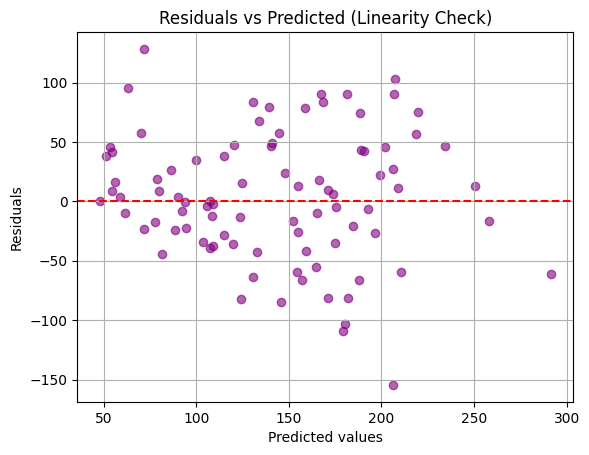

In [16]:
# Residuals
residuals = y_test - y_pred

# Residuals vs predicted values
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linearity Check)")
plt.grid(True)
plt.show()


Interpretation:

    Residuals should be randomly scattered around 0 (no curve or funnel).

    Curved patterns suggest non-linearity → try polynomial regression or non-linear models.

### 2. **Independence of Errors**
- Observations (and thus residuals) should be **independent** of each other.
- Especially important in **time series** or **grouped data**.

*Goal:*     
Ensure errors aren’t autocorrelated (important for time-based data).

*Check:*  
Use **Durbin-Watson test** (for time series). In non-sequential data, it's often assumed.

The **Durbin-Watson (DW) Test** detects the presence of **autocorrelation** (also known as serial correlation) in the residuals from a regression analysis. 

Autocorrelation occurs when the residuals are not independent from one observation to the next, which violates another assumption of OLS regression.

Null and Alternative Hypotheses:

- **H₀ (Null Hypothesis):** No autocorrelation (i.e., residuals are independent).
- **H₁ (Alternative Hypothesis):** Positive or negative first-order autocorrelation.

Interpretation:
- **DW ≈ 2**: No autocorrelation
- **DW < 2**: Positive autocorrelation
- **DW > 2**: Negative autocorrelation
- Values typically range between 0 and 4

Rule of Thumb:
- DW < 1.5 suggests **positive autocorrelation**
- DW > 2.5 suggests **negative autocorrelation**


In [17]:
from statsmodels.stats.stattools import durbin_watson

# Check Durbin-Watson statistic
durbin_watson(residuals)

np.float64(2.2427792764677363)

Interpretation:

**Value close to 2** → residuals are independent.

**< 1.5 or > 2.5** → potential autocorrelation.

In our case (random sampling, not time-series), this is generally assumed to be satisfied.

### 3. **Homoscedasticity (Constant Variance of Errors)**
- The residuals (errors) should have **constant variance** across all levels of the independent variables.
- Violations lead to **heteroscedasticity**, which can affect model accuracy and standard errors.

*Goal:*     
Ensure residuals have consistent spread.

*Check:*  

1)  Same plot as Linearity:  Plot residuals vs predicted values. 

        The spread of residuals should be consistent (no funnel shape).

        If the spread of residuals increases or decreases (funnel shape), this violates the assumption.

2) You can also use a formal test (e.g. Breusch-Pagan):

The **Breusch-Pagan (BP) Test** is used to detect **heteroskedasticity** in a linear regression model. 

Heteroskedasticity occurs when the variance of the error terms is not constant across observations, which violates one of the key assumptions of Ordinary Least Squares (OLS) regression.

 Null and Alternative Hypotheses:
- **H₀ (Null Hypothesis):** Homoskedasticity — the variance of the error terms is constant.
- **H₁ (Alternative Hypothesis):** Heteroskedasticity — the variance of the error terms depends on the values of the independent variables.

    Interpretation:

        p > 0.05 → homoscedasticity holds (residual variance is constant).

        p < 0.05 → heteroscedasticity → transform target or use robust models.



### Plot residuals vs predicted values. 

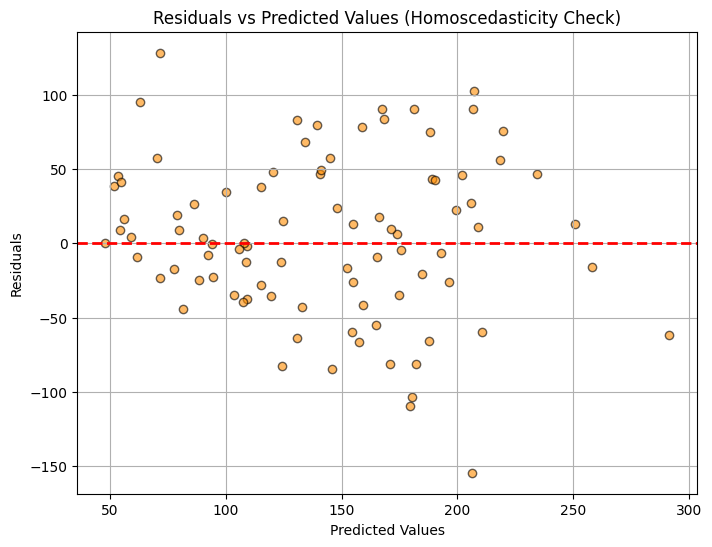

In [18]:
# Predicted values
y_pred = lr_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot: Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='darkorange', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Homoscedasticity Check)")
plt.grid(True)
plt.show()


### 📊 Homoscedasticity Plot (Residuals vs Predicted Values)

- This plot helps verify the **constant variance (homoscedasticity)** assumption in linear regression.
- Residuals should be **randomly scattered** with roughly **equal spread** across all predicted values.

#### ✅ Interpretation:
- If the residuals form a **funnel shape** (i.e., wider or narrower as predictions increase), it indicates **heteroscedasticity**.
- A good model should show a **cloud-like** pattern around zero.

###  Breusch-Pagan Test

In [19]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Add constant to features
X_test_sm = sm.add_constant(X_test)

# Run Breusch-Pagan test
_, pval, _, _ = sms.het_breuschpagan(residuals, X_test_sm)

print(f"Breusch-Pagan p-value: {pval:.4f}")

Breusch-Pagan p-value: 0.0229


### 4. **Normality of Errors**
- The residuals should be **approximately normally distributed**.
- Important when making **confidence intervals** and **hypothesis tests**.

*Goal:*     
Residuals should be normally distributed.

*Check:*  
Use a **histogram** or **Q-Q plot** of residuals. Apply **Shapiro-Wilk** or **Kolmogorov-Smirnov** tests if needed.

### Histogram and Q-Q Plot:

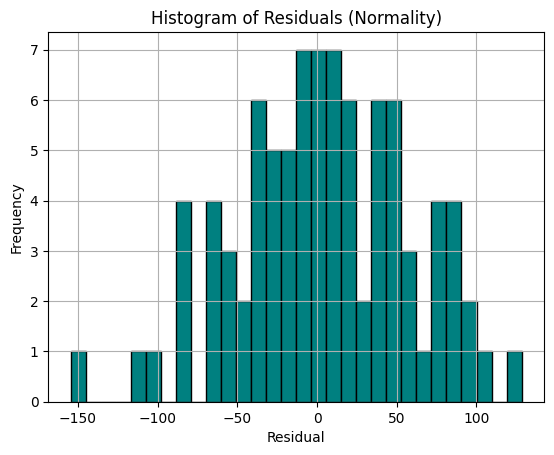

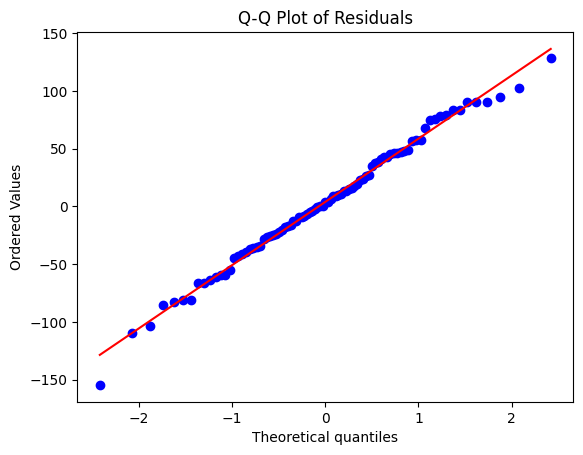

In [20]:
# Histogram
plt.hist(residuals, bins=30, color='teal', edgecolor='k')
plt.title("Histogram of Residuals (Normality)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Q-Q plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Interpretation:

    Histogram should be bell-shaped.

    Q-Q plot points should lie roughly on the diagonal.

    Major deviations → non-normality → try transforming the target (log(y)).

### 5. **No (or Little) Multicollinearity**
- Independent variables should **not be too highly correlated** with each other.
- High multicollinearity can make it difficult to determine the effect of each predictor.

*Goal:*     
Ensure predictors are not too highly correlated.

*Check:*  
Use a **correlation matrix** or compute the **Variance Inflation Factor (VIF)**.

### Check with VIF (Variance Inflation Factor):

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant
X_train_sm = sm.add_constant(X_train)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i+1) for i in range(X.shape[1])]
vif_data


,feature,VIF
0,age,1.22
1,sex,1.27
2,bmi,1.57
3,bp,1.42
4,s1,55.25
5,s2,35.76
6,s3,14.29
7,s4,9.33
8,s5,10.07
9,s6,1.50


Interpretation:

    VIF > 5 → high multicollinearity (some use 10 as a threshold).

    Consider dropping or combining highly correlated features.

| Assumption            | What It Means                                              | What to Check                    | Why It Matters                          | If Violated                                     | Suggested Fixes                              |
| --------------------- | ---------------------------------------------------------- | -------------------------------- | --------------------------------------- | ----------------------------------------------- | -------------------------------------------- |
| **Linearity**         | The relationship between predictors and outcome is linear  | Residual vs fitted plots         | Model must match data pattern           | Non-random residuals                            | Add polynomial terms, try tree models        |
| **Independence**      | Observations (errors) are not correlated with each other   | Durbin-Watson test (time series) | Avoid biased or autocorrelated errors   | Residual autocorrelation                        | Use time-series models (ARIMA, etc.)         |
| **Homoscedasticity**  | Constant variance of residuals across levels of predictors | Residual spread                  | Ensures consistent prediction errors    | Funnel shape in residuals                       | Use log/Box-Cox transforms, or robust models |
| **Normality**         | Residuals follow a normal distribution                     | Histogram / Q-Q plot             | Valid statistical inference             | Residuals not bell-shaped or Q-Q line deviation | Transform target, use bootstrapping          |
| **Multicollinearity** | Predictors are not highly correlated with each other       | Correlation matrix, VIF          | Prevents unstable coefficient estimates | VIF > 5                                         | Drop or combine correlated features          |


### Evaluate the Model Using Various Metrics

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

Linear Regression Model Evaluation Metrics

    1)  Mean Absolute Error (MAE)

    2)  Mean Squared Error (MSE)

    3)  Root Mean Squared Error (RMSE)

    4)  R² Score (Coefficient of Determination)

    5)  Adjusted R² Score

    6)  Mean Absolute Percentage Error (MAPE)

    7)  Residual Analysis / Plots

### Mean Absolute Error (MAE)

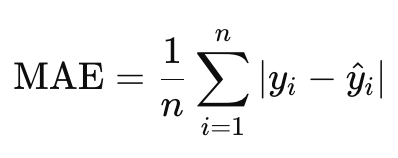

Interpretation:
Average magnitude of the errors between predicted and actual values. It tells you how much the predictions deviate from actual values on average.

When to Use:

    You want a metric that’s easy to understand

    You want to treat all errors equally, without penalizing large ones more

Pros:

    Same units as target variable

    Not sensitive to outliers

Example:
MAE = 45 → On average, your predictions are off by 45 units.

In [23]:
# MAE: Average of the absolute errors
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 42.79


### Mean Squared Error (MSE)

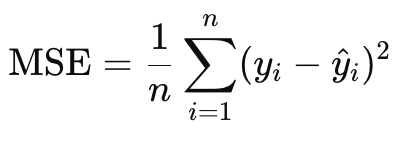

Interpretation:
The average of squared differences between predictions and actual values. Larger errors have disproportionately more impact.

When to Use:

    You want to penalize large errors more heavily

Cons:

    Not interpretable in original units (e.g., squared BMI)

    Sensitive to outliers

In [24]:
# MSE: Average of the squared errors
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 2900.19


### Root Mean Squared Error (RMSE)

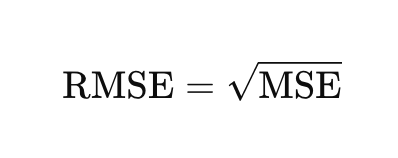

Interpretation:
Represents the standard deviation of prediction errors. Like MAE but penalizes large errors more.

When to Use:

    You want error in the same units as target

    You want to emphasize larger errors

Example:
RMSE = 60 → Typical deviation from true values is ~60 units.

In [25]:
# RMSE: Square root of MSE (same unit as the target)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 53.85


### R² Score (Coefficient of Determination)

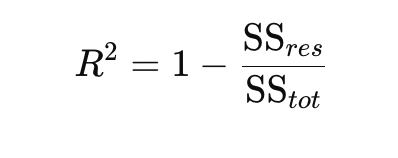

Where,

    SSres​ — Residual Sum of Squares (a.k.a. Sum of Squared Errors) :- Measures the total variance in the target variable. It represents how far each actual value is from the mean of all actual values. It's like the baseline error you'd have if you just predicted the mean for everything.

    SStot​ — Total Sum of Squares :- Measures the unexplained variance — the difference between the actual values and the predicted values.

    SSreg​ — Regression Sum of Squares :- Represents the explained variance: how much the model improved prediction over just using the mean.

$$SStot​=SSres​+SSreg​$$

Interpretation:
Proportion of variance in the dependent variable that is predictable from the independent variables.

Intuition Behind R²

    If the model perfectly predicts the data:

$$SSres=0, so R2=1$$

    If the model predicts the mean for every point:

$$SSres=SStot​, so R2=0$$

    If the model is worse than the mean:

$$SSres>SStot, so R2<0$$

When to Use:

    You want to evaluate overall model fit

    Comparing models on same dataset

Caution:

    Always increases with more features, even if they’re not helpful

In [26]:
# R² Score: Proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.4526


### Adjusted R² Score

Adjusted R² accounts for the number of predictors and is a better measure when dealing with multiple features.


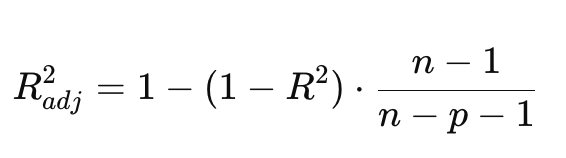

Where:

    n: number of samples

    p: number of predictors

Interpretation:
Adjusted version of R² that penalizes the addition of unnecessary predictors.

When to Use:

    Comparing multiple linear models with different feature sets

    Feature selection and model simplification

Pros:

    Accounts for model complexity

    Helps avoid overfitting

In [27]:
# Calculate Adjusted R²
n = X_test.shape[0]   # number of data points
p = X_test.shape[1]   # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R² Score: {adjusted_r2:.4f}")


Adjusted R² Score: 0.3824


### Mean Absolute Percentage Error (MAPE)

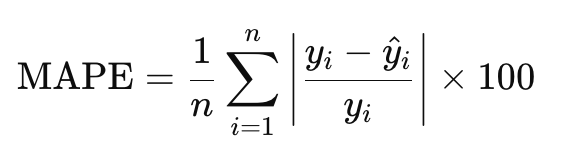

Interpretation:
Average percentage error between predicted and actual values.

When to Use:

    Business forecasting (e.g. sales, revenue)

    You want percentage-based error metric

Caution:

    Undefined when actual value is 0

    Inflates error when actual values are small


In [28]:
# MAPE: Percentage-based MAE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Mean Absolute Percentage Error (MAPE): 37.50%


### Residual Analysis

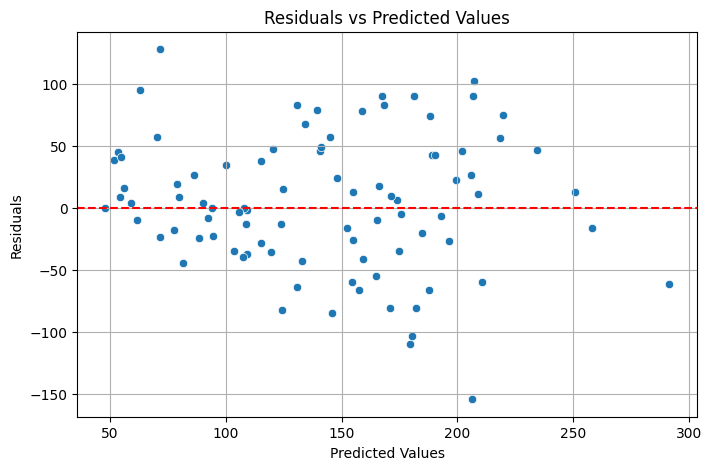

In [29]:
#Plotting residuals can reveal patterns the model didn’t capture.

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()



| Metric          | Best For                                 | Advantages                         | Limitations                              |
| --------------- | ---------------------------------------- | ---------------------------------- | ---------------------------------------- |
| **MAE**         | Interpretability, general performance    | Robust to outliers, simple         | Doesn't penalize large errors enough     |
| **MSE**         | Penalizing large errors                  | Strong penalty on large deviations | Hard to interpret (squared units)        |
| **RMSE**        | Emphasizing large errors with unit match | Balanced and interpretable         | Sensitive to outliers                    |
| **R²**          | Overall model fit                        | Intuitive (0 to 1 scale)           | Increases with irrelevant features       |
| **Adjusted R²** | Feature selection, model comparison      | Penalizes overfitting              | Harder to explain to non-technical users |
| **MAPE**        | Business, sales, forecasting             | Percent-based and intuitive        | Cannot handle zeros or small targets     |


Best Practice Recommendation

    Use RMSE + R² for overall performance

    Use MAE when you need simple interpretability

    Use Adjusted R² for feature selection

    Use MAPE for business or finance contexts (ensure no zeros)

    Compare multiple metrics for a more complete picture